In [1]:
import os
import sys
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.patches as mpatches
import nltk

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [3]:
train_df = pd.read_csv('../content/train.tsv', delimiter='\t', header = None)
valid_df = pd.read_csv('../content/valid.tsv', delimiter='\t', header = None)
test_df = pd.read_csv('../content/test.tsv', delimiter='\t', header = None)


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [5]:
test_df.drop([0],axis=1,inplace=True)

test_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [6]:
test_df.drop([3],axis=1,inplace=True)
test_df.drop([4],axis=1,inplace=True)
test_df.drop([5],axis=1,inplace=True)
test_df.drop([6],axis=1,inplace=True)
test_df.drop([7],axis=1,inplace=True)
test_df.drop([8],axis=1,inplace=True)
test_df.drop([9],axis=1,inplace=True)
test_df.drop([10],axis=1,inplace=True)
test_df.drop([11],axis=1,inplace=True)
test_df.drop([12],axis=1,inplace=True)
test_df.drop([13],axis=1,inplace=True)
test_df.head()

,1,2
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...
3,half-true,Suzanne Bonamici supports a plan that will cut...
4,pants-fire,When asked by a reporter whether hes at the ce...


In [7]:
valid_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [8]:
valid_df.drop([0],axis=1,inplace=True)
valid_df.drop([3],axis=1,inplace=True)
valid_df.drop([4],axis=1,inplace=True)
valid_df.drop([5],axis=1,inplace=True)
valid_df.drop([6],axis=1,inplace=True)
valid_df.drop([7],axis=1,inplace=True)
valid_df.drop([8],axis=1,inplace=True)
valid_df.drop([9],axis=1,inplace=True)
valid_df.drop([10],axis=1,inplace=True)
valid_df.drop([11],axis=1,inplace=True)
valid_df.drop([12],axis=1,inplace=True)
valid_df.drop([13],axis=1,inplace=True)
valid_df.head()

,1,2
0,barely-true,We have less Americans working now than in the...
1,pants-fire,"When Obama was sworn into office, he DID NOT u..."
2,false,Says Having organizations parading as being so...
3,half-true,Says nearly half of Oregons children are poor.
4,half-true,On attacks by Republicans that various program...


In [9]:
test_df.head()

,1,2
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...
3,half-true,Suzanne Bonamici supports a plan that will cut...
4,pants-fire,When asked by a reporter whether hes at the ce...


In [10]:
def map_f(x):
    if x=='mostly-true' or x == 'true':
        return 0
    else:
        return 1
    
train = pd.DataFrame()
valid = pd.DataFrame()
test = pd.DataFrame()

train['text'] = train_df[2]
train['label'] = train_df[1].apply(map_f)

valid['text'] = valid_df[2]
valid['label'] = valid_df[1].apply(map_f)

test['text'] = train_df[2]
test['label'] = test_df[1].apply(map_f)

In [11]:
train.head()

,text,label
0,Says the Annies List political group supports ...,1
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",0
3,Health care reform legislation is likely to ma...,1
4,The economic turnaround started at the end of ...,1


In [12]:
test.head()


,text,label
0,Says the Annies List political group supports ...,0.0
1,When did the decline of coal start? It started...,1.0
2,"Hillary Clinton agrees with John McCain ""by vo...",1.0
3,Health care reform legislation is likely to ma...,1.0
4,The economic turnaround started at the end of ...,1.0


In [13]:
valid.head()

,text,label
0,We have less Americans working now than in the...,1
1,"When Obama was sworn into office, he DID NOT u...",1
2,Says Having organizations parading as being so...,1
3,Says nearly half of Oregons children are poor.,1
4,On attacks by Republicans that various program...,1


In [14]:
# Removing stopwords in training data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Removing stopwords in validation data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

valid['text'] = valid['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Removing stopwords in testing data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Convert to lowercase in training data

train['text'] = train['text'].apply(lambda x: x.lower())
train.head()

,text,label
0,says annies list political group supports thir...,1
1,when decline coal start? it started natural ga...,1
2,"hillary clinton agrees john mccain ""by voting ...",0
3,health care reform legislation likely mandate ...,1
4,the economic turnaround started end term.,1


In [18]:
# Convert to lowercase in validation data

valid['text'] = valid['text'].apply(lambda x: x.lower())
valid.head()

,text,label
0,we less americans working 70s.,1
1,"when obama sworn office, did not use holy bibl...",1
2,says having organizations parading social welf...,1
3,says nearly half oregons children poor.,1
4,on attacks republicans various programs econom...,1


In [19]:
# Convert to lowercase in testing data

test['text'] = test['text'].apply(lambda x: x.lower())
test.head()

,text,label
0,says annies list political group supports thir...,0.0
1,when decline coal start? it started natural ga...,1.0
2,"hillary clinton agrees john mccain ""by voting ...",1.0
3,health care reform legislation likely mandate ...,1.0
4,the economic turnaround started end term.,1.0


In [20]:
# Remove punctuation in training data

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

train['text'] = train['text'].apply(punctuation_removal)

train.head()

,text,label
0,says annies list political group supports thir...,1
1,when decline coal start it started natural gas...,1
2,hillary clinton agrees john mccain by voting g...,0
3,health care reform legislation likely mandate ...,1
4,the economic turnaround started end term,1


In [21]:
# Remove punctuation in validation data

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

valid['text'] = valid['text'].apply(punctuation_removal)

valid.head()

,text,label
0,we less americans working 70s,1
1,when obama sworn office did not use holy bible...,1
2,says having organizations parading social welf...,1
3,says nearly half oregons children poor,1
4,on attacks republicans various programs econom...,1


In [22]:
# Remove punctuation in testing data

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

test['text'] = test['text'].apply(punctuation_removal)

test.head()

,text,label
0,says annies list political group supports thir...,0.0
1,when decline coal start it started natural gas...,1.0
2,hillary clinton agrees john mccain by voting g...,1.0
3,health care reform legislation likely mandate ...,1.0
4,the economic turnaround started end term,1.0


label
0    3638
1    6602
Name: text, dtype: int64


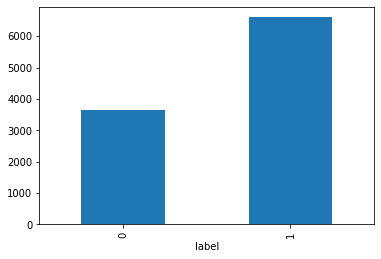

In [23]:
print(train.groupby(['label'])['text'].count())
train.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

label
0    420
1    864
Name: text, dtype: int64


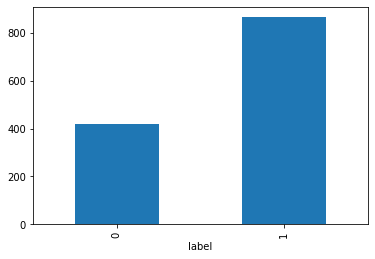

In [24]:
print(valid.groupby(['label'])['text'].count())
valid.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

label
0.0    449
1.0    818
Name: text, dtype: int64


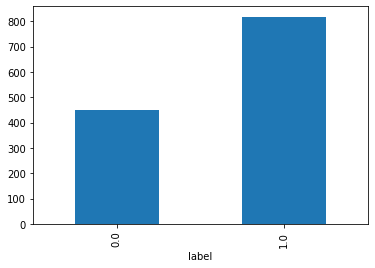

In [25]:
print(test.groupby(['label'])['text'].count())
test.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

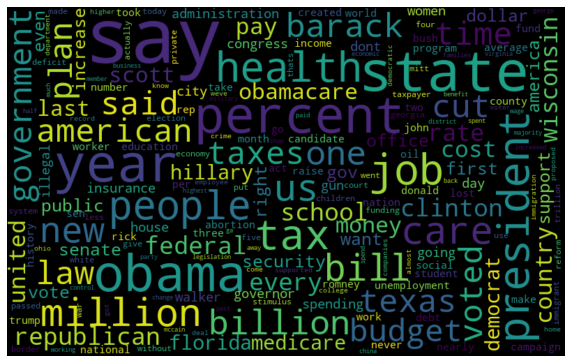

In [26]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = train[train["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

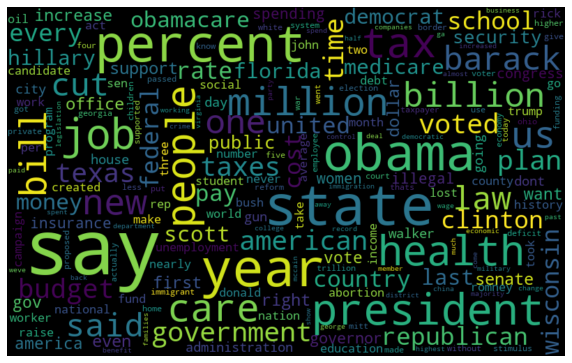

In [27]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = train[train['label'] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

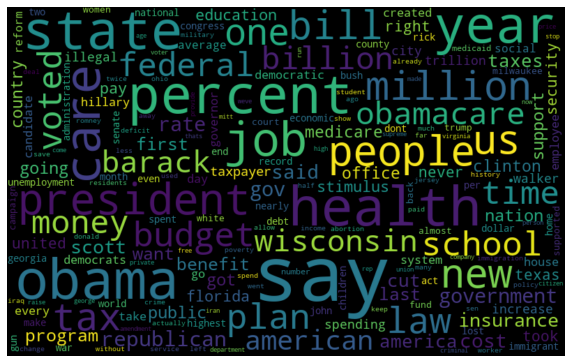

In [28]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data =valid[valid["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

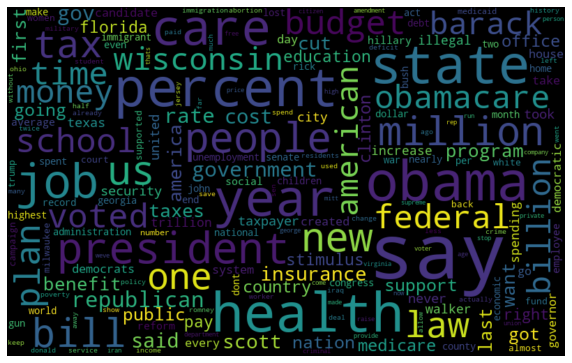

In [29]:
# Word cloud for real news
from wordcloud import WordCloud

real_data =valid[valid["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

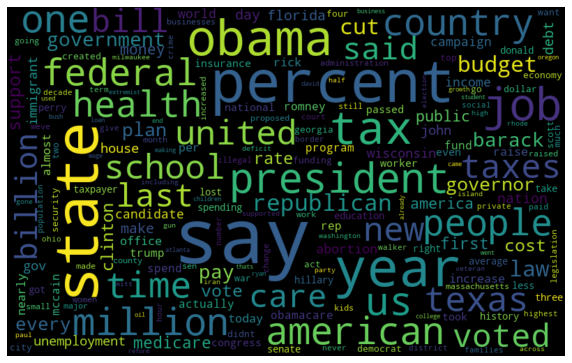

In [30]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = test[test["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

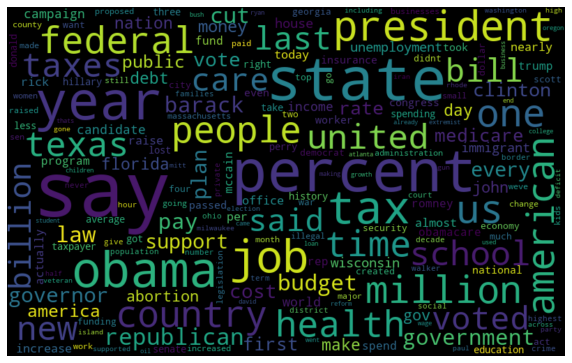

In [31]:
# Word cloud for real news
from wordcloud import WordCloud

real_data =test[test["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

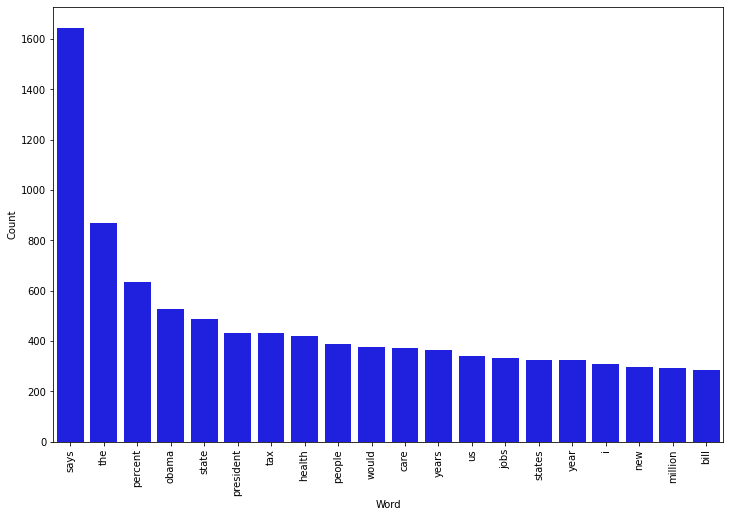

In [33]:
#Most frequent words in fake news
counter(train[train["label"] ==1 ], "text", 20)

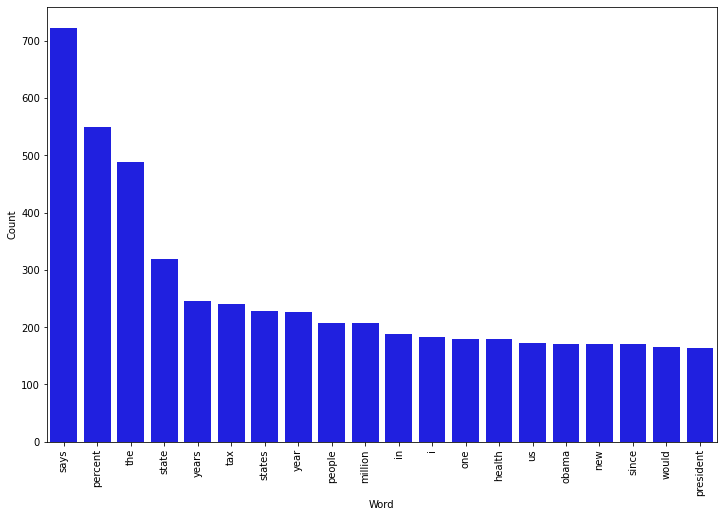

In [34]:
#Most frequent words in real news
counter(train[train["label"] ==0 ], "text", 20)

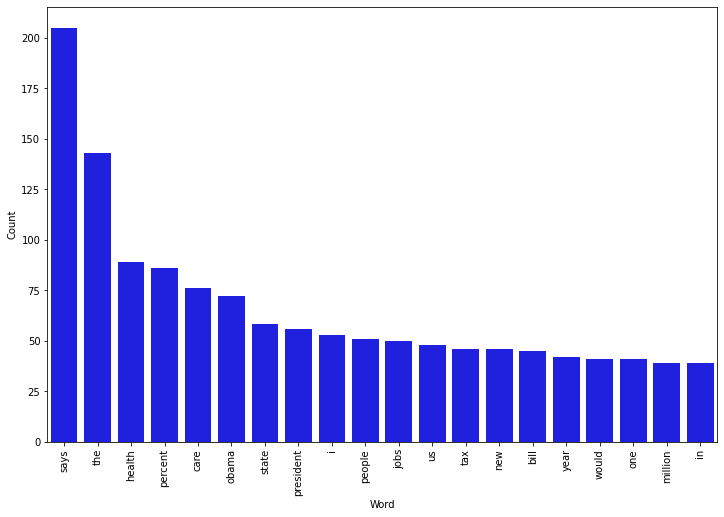

In [35]:
#Most frequent words in fake news
counter(valid[valid["label"] ==1 ], "text", 20)

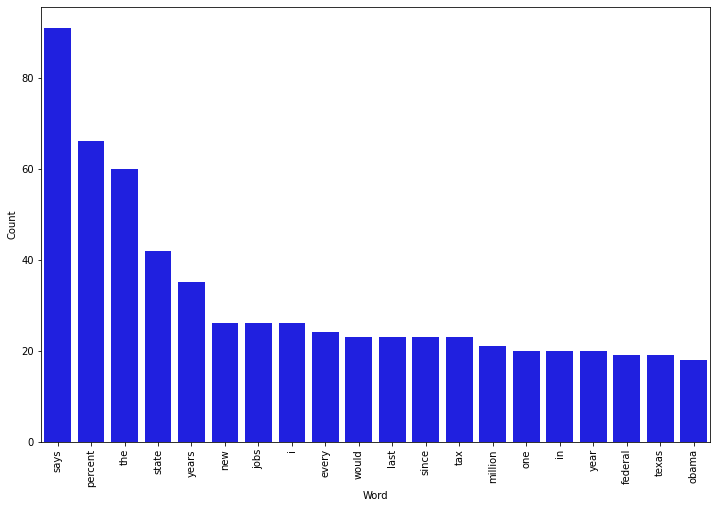

In [36]:
#Most frequent words in real news
counter(valid[valid["label"] ==0 ], "text", 20)

In [37]:
len(train), len(valid), len(test)

(10240, 1284, 10240)

In [38]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
train = train.dropna()
test = test.dropna()
valid = valid.dropna()

In [40]:
X_train = pd.concat([train, valid])['text']
Y_train = pd.concat([train, valid])['label']
X_test = test['text']
Y_test = test['label']

In [41]:
X_train.head()

0    says annies list political group supports thir...
1    when decline coal start it started natural gas...
2    hillary clinton agrees john mccain by voting g...
3    health care reform legislation likely mandate ...
4             the economic turnaround started end term
Name: text, dtype: object

In [42]:
Y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [43]:
X_test.head()

0    says annies list political group supports thir...
1    when decline coal start it started natural gas...
2    hillary clinton agrees john mccain by voting g...
3    health care reform legislation likely mandate ...
4             the economic turnaround started end term
Name: text, dtype: object

In [44]:
Y_test.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [45]:
train =train[train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [46]:
valid =valid[valid.isin([np.nan, np.inf, -np.inf]).any(1)]

In [47]:
test =test[test.isin([np.nan, np.inf, -np.inf]).any(1)]

In [48]:
#Naive Bayes
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, Y_train)
prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 62.83%


Confusion matrix, without normalization


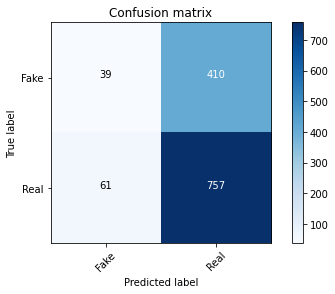

In [49]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [50]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 58.09%


Confusion matrix, without normalization


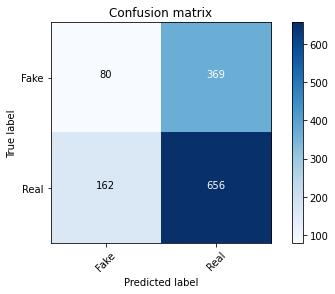

In [51]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [53]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 61.48%


Confusion matrix, without normalization


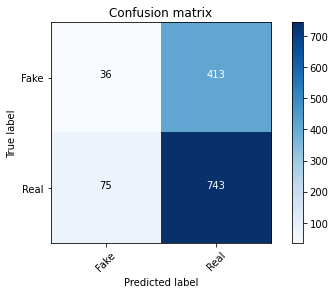

In [55]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [56]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 54.22%


Confusion matrix, without normalization


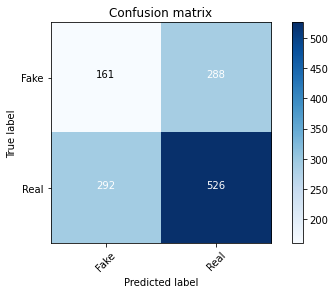

In [58]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [59]:
#SVM
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 58.25%


Confusion matrix, without normalization


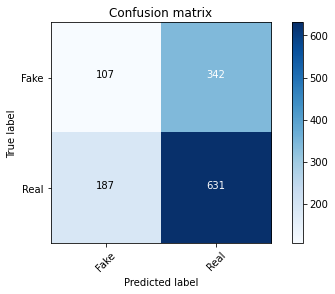

In [61]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7f5e5c7df2d0>,
 <a list of 14 Text major ticklabel objects>)

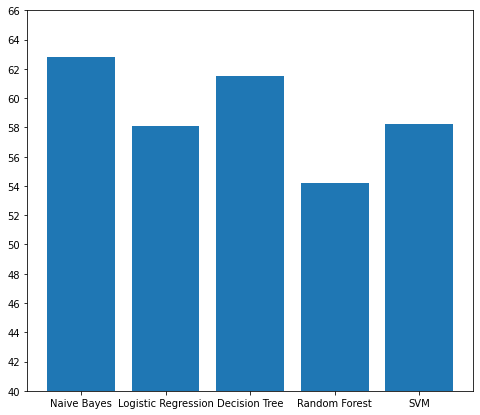

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(40,66)
plt.yticks((40, 42, 44, 46, 48, 50, 52, 54, 56, 58,60,62,64,66))